In [1]:
import mxnet as mx

In [2]:
def mlp_layer(input_layer, n_hidden, activation=None, BN=False):

    """
    A MLP layer with activation layer and BN
    :param input_layer: input sym
    :param n_hidden: # of hidden neurons
    :param activation: the activation function
    :return: the symbol as output
    """

    # get a FC layer
    l = mx.sym.FullyConnected(data=input_layer, num_hidden=n_hidden)
    # get activation, it can be relu, sigmoid, tanh, softrelu or none
    if activation is not None:
        l = mx.sym.Activation(data=l, act_type=activation)
    if BN:
        l = mx.sym.BatchNorm(l)
    return l

In [3]:
def conv_layer(input_layer,
               num_filter=32,
               conv_kernel=(3, 3),
               conv_stride=(1, 1),
               pad=(1, 1),
               activation='relu',
               pool_kernel=(2, 2),
               pool_stride=(2, 2),
               pool_type='max',
               if_pool=False,
               if_bn = False):
    """
    :return: a single convolution layer symbol
    """
    # todo: Design the simplest convolution layer
    # Find the doc of mx.sym.Convolution by help command
    # Do you need BatchNorm?
    # Do you need pooling?
    # What is the expected output shape?
    l = mx.sym.Convolution(data=input_layer, num_filter=num_filter, kernel=conv_kernel, stride=conv_stride, pad=pad)
    if if_bn:
        l = mx.sym.BatchNorm(l)

    if activation is not None:
        l = mx.sym.Activation(data=l, act_type=activation)

    if if_pool:
        l = mx.sym.Pooling(data=l,stride=pool_stride, kernel=pool_kernel, pool_type=pool_type)

    return l

In [4]:
    data = mx.sym.Variable("data")
    # todo: design the CNN architecture
    # How deep the network do you want? like 4 or 5
    # How wide the network do you want? like 32/64/128 kernels per layer
    # How is the convolution like? Normal CNN? Inception Module? VGG like?
    l = conv_layer(data, num_filter=32, if_pool=True, if_bn=True)
    l = conv_layer(l, num_filter=64, if_pool=True)

    l = mx.sym.flatten(data=l)

    # Your Design
    l = mlp_layer(input_layer=l, n_hidden=100, activation="relu", BN=True)

    # MNIST has 10 classes
    l = mx.sym.FullyConnected(data=l, num_hidden=10)
    # Softmax with cross entropy loss
    l = mx.sym.SoftmaxOutput(data=l, name='softmax')

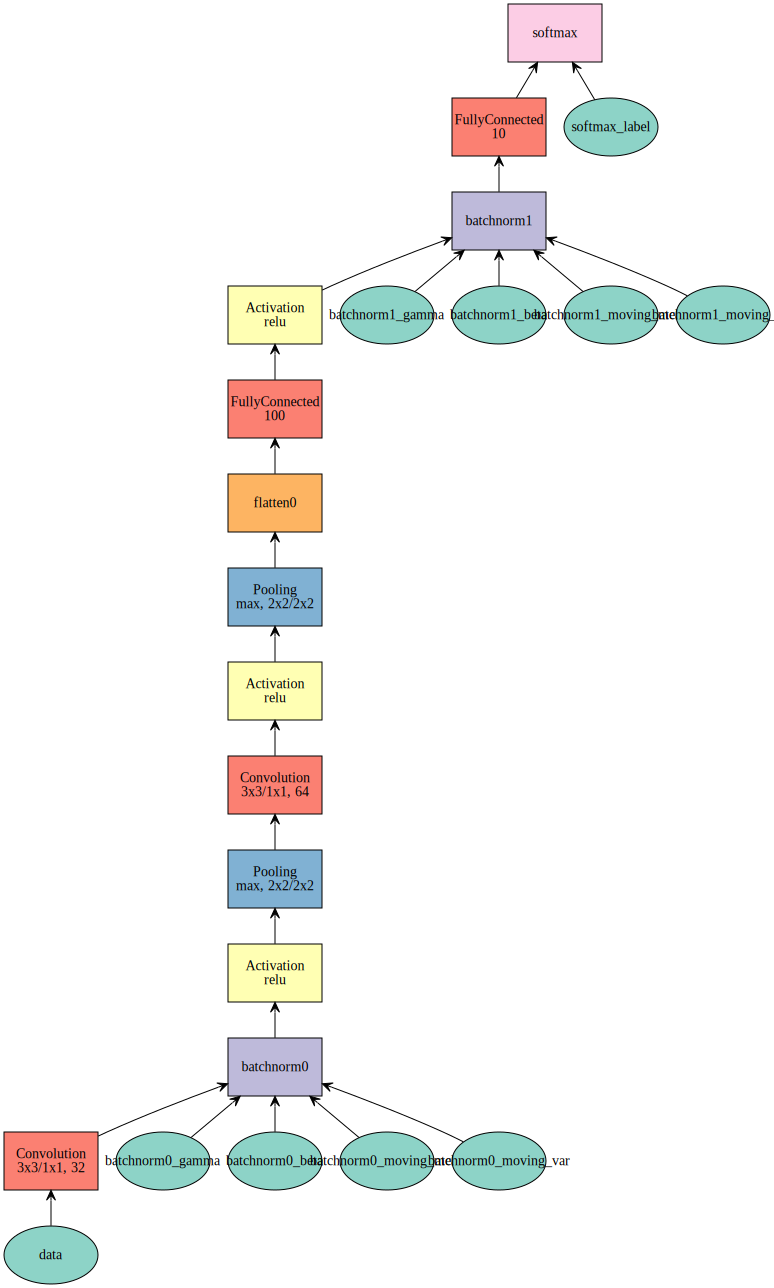

In [5]:
mx.viz.plot_network(l)

In [11]:
fig = mx.viz.plot_network(l)

In [14]:
type(fig)

graphviz.dot.Digraph

In [16]:
?fig.save

In [24]:
?fig.format

In [25]:
fig.render(filename='cnn')

'cnn.pdf'